# Working Capital Optimization using Predictive Analysis

### **Project Overview**

- Working capital optimization is the strategic management of a company's current assets and liabilities to improve operational efficiency and financial health. It involves striking the right balance between accounts receivable (AR) and accounts payable (AP) to ensure sufficient liquidity while minimizing costs and risks.

- AR data represents the money owed to the company by customers, while AP data represents the money the company owes to its suppliers.

- The project's primary objective is to predict the timing of customer and supplier payments to maintain cash flow and liquidity within specific timeframes. Using historical data and predictive modeling techniques, the project aims to forecast when customers are likely to make payments and when the company should settle payments to suppliers.

- These predictions empower the company to proactively manage cash flow, ensuring that customer payments arrive on time to cover supplier payments. This proactive approach helps maintain a strong cash position, enhances liquidity, and enables the company to meet its financial obligations effectively.

- The project's ultimate goal is to optimize working capital management by leveraging data from accounts receivable and payable. Through predictive analysis, the project seeks to accurately forecast the timing of customer and supplier payments, ensuring cash flow and liquidity are maintained within predefined periods.

---


### **Outcomes**

* Develop strong data analysis skills by conducting exploratory data analysis of accounts receivable and payable data.
* Gain experience in transforming and structuring data to create meaningful features for financial predictive modeling.
* Build regression models using various algorithms, including RandomForestRegressor, LinearRegressor, KNeighborsRegressor, GradientBoostingRegressor, and SVR.
* Understand the significance of different features in predicting payment timings effectively.
* Acquire expertise in predicting and forecasting cash flow based on customer and supplier payments.
* Learn to optimize working capital by assessing and maintaining the balance between accounts receivable and payable.
* Enhance your ability to communicate results and insights derived from predictive models.
* Gain practical experience in applying data analysis and predictive modeling techniques to real-world financial datasets.
* Develop an understanding of key financial concepts, working capital management, and its impact on overall business performance.


### **Approach**

* AR Data:
    * Exploratory Data Analysis (EDA): Analyze the accounts receivable data to gain insights into the distribution, trends, and patterns.
    * Feature Engineering: Transform and manipulate the AR data to extract relevant features for the prediction model.
    * Model Building: Utilize various regression models such as RandomForestRegressor, LinearRegression, KNeighborsRegressor, GradientBoostingRegressor, and SVR to predict the week of customer payments.


* AP Data:
    * EDA: Perform exploratory analysis on the accounts payable data to understand its characteristics and identify any anomalies.
    * Feature Engineering: Engineer additional features from the AP data that may be relevant for the analysis and prediction.
    * Model Building: Develop prediction models based on the AP data to forecast the week of supplier payments.


* Working Capital Optimization (WCO) Calculations:
    * Group and sum the receivables and payables data on a weekly basis.
    * Calculate the working capital by subtracting the sum of payables from the sum of receivables for each week.
    * Analyze the working capital figures to identify periods of positive or negative cash flow and assess the overall liquidity.

---


## Data Reading from Various Sources

In this project, we'll collect data from different sources, which include Excel files for accounts receivable, accounts payable, customer data, and supplier data. We'll also access data from an MS SQL Server database hosted on an Amazon RDS (Relational Database Service) instance.

### Reading Data from Excel Files

To start, we'll read data from Excel files found in the 'data/' folder. We'll use the pandas library in Python, which provides convenient functions for this task.

```python
import pandas as pd

# File paths for Excel data files
ar_file_path = 'data/receivables_data.xls'
ap_file_path = 'data/payables_data.xls'
customer_file_path = 'data/customers_data.xls'
supplier_file_path = 'data/suppliers_data.xls'

# Reading data from Excel files into pandas DataFrames
ar_data = pd.read_excel(ar_file_path)
ap_data = pd.read_excel(ap_file_path)
customer_data = pd.read_excel(customer_file_path)
supplier_data = pd.read_excel(supplier_file_path)
```

Once the data is in DataFrames, we can clean, preprocess, and engineer features to prepare it for further analysis and modeling.

---

### Reading Data from MS SQL Server Database on Amazon RDS

In addition to Excel files, we have relevant data in an MS SQL Server database on an Amazon RDS instance. We'll use the pyodbc library to connect to the database and fetch the required data.

```python
import pyodbc

# Connection details for the SQL Server database on Amazon RDS
server = 'your_server_name'
database = 'your_database_name'
username = 'your_username'
password = 'your_password'

# Establishing a connection to the SQL Server database
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
connection = pyodbc.connect(connection_string)

# SQL query to retrieve data from the database
sql_query = 'SELECT * FROM your_table_name'

# Reading data from the database into a pandas DataFrame
sql_data = pd.read_sql(sql_query, connection)

# Closing the database connection
connection.close()
```

In the code above, please replace 'your_server_name', 'your_database_name', 'your_username', 'your_password', and 'your_table_name' with the actual connection details and table name for the specific data you want to retrieve.

Using the pyodbc library, we can efficiently fetch data from the SQL Server database and store it in a pandas DataFrame. After obtaining the data, we can apply the necessary data analysis, transformation, and modeling techniques to achieve the project's objectives.

---

## **Install Packages**

In [ ]:
# python version 3.8.10
# If using Google Colab, restart runtime for updated libraries
!pip install numpy==1.24.4
!pip install pandas==2.0.3
!pip install matplotlib==3.7.2
!pip install seaborn==0.12.2
!pip install scikit-learn==1.3.0
!pip install statsmodels==0.14.0
!pip install pyodbc==4.0.39

In [1]:
## Import libraries

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
pd.options.display.float_format = '{:.2f}'.format
import statsmodels 
from statsmodels import api as sm
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')

In [7]:
import pyodbc
import pandas as pd

# Establish a connection to a SQL Server database using pyodbc.
connection = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};\
                       SERVER=xyz;\
                       PORT=1433;\
                       DATABASE=wco-db1;\
                       UID=admin;\
                       PWD=yourpassword')


In [ ]:
# Create a cursor object to execute SQL statements
cursor = connection.cursor()

# Get the list of tables in the current database
tables = cursor.tables(tableType="TABLE")

# Fetch all table names
table_names = [table.table_name for table in tables]

# Print the table names
for table_name in table_names:
    print(table_name)

---

# Account Receivable Data and Model

In [ ]:
# Read data from the 'customers_data' table in the connected SQL Server database.
customers_data = pd.read_sql("Select * from customers_data", connection)
customers_data.head()


In [4]:
# Read data from the 'receivables_data' table in the connected SQL Server database.
receivables_data = pd.read_sql("Select * from receivables_data", connection)
receivables_data.head()


,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Invoice ID,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region
0,U001,200769623,WAL-MAR corp,02/11/2020,2020,01/26/2020,02/10/2020,15,USD,54273,USD,54273.28,NAH4,1930438491,0,0,50000,01/23/2020,WEST
1,U001,200980828,BEN E,08/08/2019,2019,07/22/2019,08/11/2019,20,USD,79657,USD,79656.6,NAD1,1929646410,0,2,50000,07/20/2019,MIDWEST
2,U001,200792734,MDV/ trust,12/30/2019,2019,09/14/2019,09/29/2019,15,USD,2254,USD,2253.86,NAA8,1929873765,0,3,100000,09/14/2019,NORTHEAST
3,CA02,140105686,SYSC llc,01/00/1900,2020,03/30/2020,04/10/2020,11,CAD,3300,USD,2441.778,CA10,2960623488,1,2,100000,03/26/2020,SOUTHWEST
4,U001,200769623,WAL-MAR foundation,11/25/2019,2019,11/13/2019,11/28/2019,15,USD,33133,USD,33133.29,NAH4,1930147974,0,3,100000,11/10/2019,WEST


In [3]:
# Read data from Excel files into DataFrames.
customers_data = pd.read_excel("data/customers_data.xls")
receivables_data = pd.read_excel("data/receivables_data.xls")


In [4]:
# Create a copy of the 'receivables_data' DataFrame.
df = receivables_data.copy()


In [5]:
df.head()

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Invoice ID,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region
0,U001,200769623,WAL-MAR corp,2020-02-11 00:00:00,2020,2020-01-26,2020-02-10,15,USD,54273,USD,54273.28,NAH4,1930438491.00,0,0,50000,2020-01-23,WEST
1,U001,200980828,BEN E,2019-08-08 00:00:00,2019,2019-07-22,2019-08-11,20,USD,79657,USD,79656.60,NAD1,1929646410.00,0,2,50000,2019-07-20,MIDWEST
2,U001,200792734,MDV/ trust,2019-12-30 00:00:00,2019,2019-09-14,2019-09-29,15,USD,2254,USD,2253.86,NAA8,1929873765.00,0,3,100000,2019-09-14,NORTHEAST
3,CA02,140105686,SYSC llc,01/00/1900,2020,2020-03-30,2020-04-10,11,CAD,3300,USD,2441.78,CA10,2960623488.00,1,2,100000,2020-03-26,SOUTHWEST
4,U001,200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019,2019-11-13,2019-11-28,15,USD,33133,USD,33133.29,NAH4,1930147974.00,0,3,100000,2019-11-10,WEST


### Convert date time

In [7]:
# Check and confirm the data types of the DataFrame.
df.dtypes


Business Code                     object
Customer Number                   object
Customer Name                     object
Payment_Date                      object
Business Year                      int64
Posting_Date              datetime64[ns]
Due_Date                  datetime64[ns]
Payterm                            int64
Invoice Currency                  object
Total Open Amount                  int64
USD_CURRENNCY                     object
Total Open Amount_USD            float64
Customer Payment Terms            object
Invoice ID                       float64
Is Open                            int64
DUNNLEVEL                          int64
Credit_limit                       int64
Baseline_Date             datetime64[ns]
Region                            object
dtype: object

In [8]:
# Convert selected columns to datetime format with the specified date format.
df['Posting_Date'] = pd.to_datetime(df['Posting_Date'], format='%m/%d/%Y')
df['Due_Date'] = pd.to_datetime(df['Due_Date'], format='%m/%d/%Y')
df['Baseline_Date'] = pd.to_datetime(df['Baseline_Date'], format='%m/%d/%Y')


In [9]:
# Convert selected columns to integer or float format.
df['Total Open Amount_USD'] = df['Total Open Amount_USD'].astype(float).round(1)
df['Payterm'] = df['Payterm'].astype(int)
df['DUNNLEVEL'] = df['DUNNLEVEL'].astype(int)
df['Is Open'] = df['Is Open'].astype(int)
df['Credit_limit'] = df['Credit_limit'].astype(int)


In [10]:
# Check the count of unique values in the 'Is Open' column.
df['Is Open'].value_counts()


0    40000
1    10000
Name: Is Open, dtype: int64

In [11]:
# from this problem statement we have removed the open items, but in actual, once the model is ready we use open dataset to make the prediction 

# Filter the dataset to include only closed items (Is Open = 0) for model training.
rslt_df = df.loc[df['Is Open'] == 0]


In [12]:
rslt_df.dtypes

Business Code                     object
Customer Number                   object
Customer Name                     object
Payment_Date                      object
Business Year                      int64
Posting_Date              datetime64[ns]
Due_Date                  datetime64[ns]
Payterm                            int32
Invoice Currency                  object
Total Open Amount                  int64
USD_CURRENNCY                     object
Total Open Amount_USD            float64
Customer Payment Terms            object
Invoice ID                       float64
Is Open                            int32
DUNNLEVEL                          int32
Credit_limit                       int32
Baseline_Date             datetime64[ns]
Region                            object
dtype: object

In [13]:
# Adding id as an added column ( this is done so as to add back the dataset back to mastersheet in the end,same can be done via index also)
# Add an 'ID' column to the filtered dataset to identify items.
rslt_df['ID'] = range(1, len(rslt_df) + 1)


In [14]:
rslt_df

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Invoice ID,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region,ID
0,U001,200769623,WAL-MAR corp,2020-02-11 00:00:00,2020,2020-01-26,2020-02-10,15,USD,54273,USD,54273.30,NAH4,1930438491.00,0,0,50000,2020-01-23,WEST,1
1,U001,200980828,BEN E,2019-08-08 00:00:00,2019,2019-07-22,2019-08-11,20,USD,79657,USD,79656.60,NAD1,1929646410.00,0,2,50000,2019-07-20,MIDWEST,2
2,U001,200792734,MDV/ trust,2019-12-30 00:00:00,2019,2019-09-14,2019-09-29,15,USD,2254,USD,2253.90,NAA8,1929873765.00,0,3,100000,2019-09-14,NORTHEAST,3
4,U001,200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019,2019-11-13,2019-11-28,15,USD,33133,USD,33133.30,NAH4,1930147974.00,0,3,100000,2019-11-10,WEST,4
5,CA02,140106181,THE corporation,2019-12-04 00:00:00,2019,2019-09-20,2019-10-04,14,CAD,22226,USD,16447.10,CA10,2960581231.00,0,3,100000,2019-09-16,SOUTHEAST,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25 00:00:00,2019,2019-07-10,2019-07-25,15,USD,84780,USD,84780.40,NAC6,1929600989.00,0,2,100000,2019-07-06,MIDWEST,39996
49996,U001,200769623,WAL-MAR co,2019-09-03 00:00:00,2019,2019-08-15,2019-08-30,15,USD,6767,USD,6766.50,NAH4,1929744070.00,0,2,100000,2019-08-11,WEST,39997
49997,U001,200772595,SAFEW associates,2020-03-05 00:00:00,2020,2020-02-19,2020-03-05,15,USD,6121,USD,6120.90,NAA8,1930536775.00,0,1,100000,2020-02-16,SOUTHEAST,39998
49998,U001,200726979,BJ'S llc,2019-12-12 00:00:00,2019,2019-11-27,2019-12-12,15,USD,63,USD,63.50,NAA8,1930198546.00,0,0,100000,2019-11-27,MIDWEST,39999


In [15]:
# Print the column names in the DataFrame.
for col in rslt_df:
    print(col)


Business Code
Customer Number
Customer Name
Payment_Date
Business Year
Posting_Date
Due_Date
Payterm
Invoice Currency
Total Open Amount
USD_CURRENNCY
Total Open Amount_USD
Customer Payment Terms
Invoice ID
Is Open
DUNNLEVEL
Credit_limit
Baseline_Date
Region
ID


In [16]:
# Convert the 'Payment_Date' column to datetime format with the specified date format.
rslt_df['Payment_Date'] = pd.to_datetime(rslt_df['Payment_Date'], format='%m/%d/%Y')


In [17]:
rslt_df.dtypes

Business Code                     object
Customer Number                   object
Customer Name                     object
Payment_Date              datetime64[ns]
Business Year                      int64
Posting_Date              datetime64[ns]
Due_Date                  datetime64[ns]
Payterm                            int32
Invoice Currency                  object
Total Open Amount                  int64
USD_CURRENNCY                     object
Total Open Amount_USD            float64
Customer Payment Terms            object
Invoice ID                       float64
Is Open                            int32
DUNNLEVEL                          int32
Credit_limit                       int32
Baseline_Date             datetime64[ns]
Region                            object
ID                                 int32
dtype: object

In [18]:
# Calculate aging by subtracting 'Payment_Date' from 'Due_Date' and store it in 'Payment_flag'.
rslt_df['Payment_flag'] = rslt_df['Due_Date'] - rslt_df['Payment_Date']


In [19]:
rslt_df.head()

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,Total Open Amount_USD,Customer Payment Terms,Invoice ID,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region,ID,Payment_flag
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,54273.30,NAH4,1930438491.00,0,0,50000,2020-01-23,WEST,1,-1 days
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,79656.60,NAD1,1929646410.00,0,2,50000,2019-07-20,MIDWEST,2,3 days
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,2253.90,NAA8,1929873765.00,0,3,100000,2019-09-14,NORTHEAST,3,-92 days
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,33133.30,NAH4,1930147974.00,0,3,100000,2019-11-10,WEST,4,3 days
5,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,16447.10,CA10,2960581231.00,0,3,100000,2019-09-16,SOUTHEAST,5,-61 days


In [20]:
# Convert 'Payment_flag' into an integer variable by extracting the number of days.
rslt_df['Payment_flag'] = pd.to_numeric(rslt_df['Payment_flag'].dt.days, downcast='integer')


In [21]:
rslt_df.head()

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,Total Open Amount_USD,Customer Payment Terms,Invoice ID,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region,ID,Payment_flag
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,54273.30,NAH4,1930438491.00,0,0,50000,2020-01-23,WEST,1,-1
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,79656.60,NAD1,1929646410.00,0,2,50000,2019-07-20,MIDWEST,2,3
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,2253.90,NAA8,1929873765.00,0,3,100000,2019-09-14,NORTHEAST,3,-92
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,33133.30,NAH4,1930147974.00,0,3,100000,2019-11-10,WEST,4,3
5,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,16447.10,CA10,2960581231.00,0,3,100000,2019-09-16,SOUTHEAST,5,-61


In [22]:
# Converted payment flag into late, early and ontime flag, this is done as its needed to create features and behavorial aspect at customer level
# Categorize 'Payment_flag' into 'late', 'early', and 'ontime' flags based on conditions.
conditions = [
    (rslt_df['Payment_flag'] == 0),
    (rslt_df['Payment_flag'] < 0),
    (rslt_df['Payment_flag'] > 0)]
choices = ['ontime', 'late', 'early']
rslt_df['payment_flagname'] = np.select(conditions, choices, default='NA')
print(rslt_df)



      Business Code Customer Number       Customer Name Payment_Date  \
0              U001       200769623        WAL-MAR corp   2020-02-11   
1              U001       200980828              BEN E    2019-08-08   
2              U001       200792734          MDV/ trust   2019-12-30   
4              U001       200769623  WAL-MAR foundation   2019-11-25   
5              CA02       140106181    THE  corporation   2019-12-04   
...             ...             ...                 ...          ...   
49994          U001       200762301        C&S WH trust   2019-07-25   
49996          U001       200769623          WAL-MAR co   2019-09-03   
49997          U001       200772595    SAFEW associates   2020-03-05   
49998          U001       200726979           BJ'S  llc   2019-12-12   
49999          U001       200020431            DEC corp   2019-01-15   

       Business Year Posting_Date   Due_Date  Payterm Invoice Currency  \
0               2020   2020-01-26 2020-02-10       15        

In [23]:
rslt_df['Is Open'].value_counts()

0    40000
Name: Is Open, dtype: int64

In [24]:
rslt_df['payment_flagname'].value_counts()

late      16764
early     14786
ontime     8450
Name: payment_flagname, dtype: int64

In [25]:
# Group the data frame by month and item and extract a number of stats from each group

# Group the data by 'Customer Number' and 'payment_flagname', and calculate the sum of 'Total Open Amount_USD'.
customer_pivot = rslt_df.groupby(
    ['Customer Number', 'payment_flagname']
).agg(
    {
        'Total Open Amount_USD': "sum",
    }
).reset_index()

# Group the data by 'Customer Number' and calculate various statistics on different columns.
customer_pivot_others = rslt_df.groupby(
    ['Customer Number']
).agg(
    {
        'Invoice ID': "count",
        'Credit_limit': "mean",
        'DUNNLEVEL': "mean"
    }
).reset_index()


In [26]:
customer_pivot

,Customer Number,payment_flagname,Total Open Amount_USD
0,100000048,late,124521.70
1,100000051,early,64713.30
2,100000051,late,37169.00
3,100000158,early,392.70
4,100000158,late,348493.10
...,...,...,...
1813,CCU001,late,763891.90
1814,CCU002,early,999344.50
1815,CCU002,late,2309222.90
1816,CCU002,ontime,156826.80


In [27]:
customer_pivot_others

,Customer Number,Invoice ID,Credit_limit,DUNNLEVEL
0,100000048,2,50000.00,2.50
1,100000051,3,20000.00,2.00
2,100000158,7,42857.14,1.29
3,100000217,2,20000.00,1.00
4,100000222,27,43888.89,1.63
...,...,...,...,...
1051,CC7455,4,35000.00,1.25
1052,CCCA02,444,61936.94,1.50
1053,CCU001,41,62195.12,1.29
1054,CCU002,121,60000.00,1.55


In [28]:
# Pivot the data to reshape it, using 'Customer Number' as the index and 'payment_flagname' as columns.
reshaped_data = customer_pivot.pivot(index='Customer Number', columns='payment_flagname')


In [29]:
# Replace and fill blank values with 0.
df_filled = reshaped_data.fillna(0)


In [30]:
df_filled.head()

Total Open Amount_USD                 
payment_flagname                 early      late ontime
Customer Number                                        
100000048                         0.00 124521.70   0.00
100000051                     64713.30  37169.00   0.00
100000158                       392.70 348493.10   0.00
100000217                     60523.80      0.00   0.00
100000222                    808406.90   2588.60   0.00

In [31]:
# Print column names
for col in df_filled: 
    print(col)  


('Total Open Amount_USD', 'early')
('Total Open Amount_USD', 'late')
('Total Open Amount_USD', 'ontime')


In [32]:
# Define column name mapping
new_column_names = {'early': 'TA_ Early', 'late': 'TA_late', 'ontime': 'TA_ontime'}

# Rename DataFrame columns
df_filled.rename(columns=new_column_names, inplace=True)

# Print the modified DataFrame
print(df_filled)


                 Total Open Amount_USD                     
payment_flagname             TA_ Early    TA_late TA_ontime
Customer Number                                            
100000048                         0.00  124521.70      0.00
100000051                     64713.30   37169.00      0.00
100000158                       392.70  348493.10      0.00
100000217                     60523.80       0.00      0.00
100000222                    808406.90    2588.60      0.00
...                                ...        ...       ...
CC7455                            0.00   71914.20      0.00
CCCA02                      2291412.20 6933041.40 504350.30
CCU001                       361722.10  763891.90      0.00
CCU002                       999344.50 2309222.90 156826.80
CCU013                            0.00 8080937.20      0.00

[1056 rows x 3 columns]


In [33]:
# Calculate row sums
row_sums= df_filled.sum(axis=1)

In [34]:
# Calculate row percentages
df_row_percent = df_filled.div(row_sums, axis=0) * 100


In [35]:
# Reset the index with 'Customer Number' as the new index
df_row_percent.reset_index(level=['Customer Number'])


Customer Number Total Open Amount_USD                  
payment_flagname                             TA_ Early TA_late TA_ontime
0                      100000048                  0.00  100.00      0.00
1                      100000051                 63.52   36.48      0.00
2                      100000158                  0.11   99.89      0.00
3                      100000217                100.00    0.00      0.00
4                      100000222                 99.68    0.32      0.00
...                          ...                   ...     ...       ...
1051                      CC7455                  0.00  100.00      0.00
1052                      CCCA02                 23.55   71.26      5.18
1053                      CCU001                 32.14   67.86      0.00
1054                      CCU002                 28.84   66.64      4.53
1055                      CCU013                  0.00  100.00      0.00

[1056 rows x 4 columns]

In [36]:
# Reset the index to use 'Customer Number' as the new index
df_row_percent = df_row_percent.reset_index(level=("Customer Number",))


In [37]:
df_row_percent.columns

MultiIndex([(      'Customer Number',          ''),
            ('Total Open Amount_USD', 'TA_ Early'),
            ('Total Open Amount_USD',   'TA_late'),
            ('Total Open Amount_USD', 'TA_ontime')],
           names=[None, 'payment_flagname'])

In [38]:
# Display the remaining features at customer level
customer_pivot_others

,Customer Number,Invoice ID,Credit_limit,DUNNLEVEL
0,100000048,2,50000.00,2.50
1,100000051,3,20000.00,2.00
2,100000158,7,42857.14,1.29
3,100000217,2,20000.00,1.00
4,100000222,27,43888.89,1.63
...,...,...,...,...
1051,CC7455,4,35000.00,1.25
1052,CCCA02,444,61936.94,1.50
1053,CCU001,41,62195.12,1.29
1054,CCU002,121,60000.00,1.55


#### Merge all features into 1 dataframe

In [40]:
# Merge DataFrames on 'Customer Number'
merged_df = pd.merge(customer_pivot_others, df_row_percent, on='Customer Number')


In [41]:
merged_df.head()

,Customer Number,Invoice ID,Credit_limit,DUNNLEVEL,"(Total Open Amount_USD, TA_ Early)","(Total Open Amount_USD, TA_late)","(Total Open Amount_USD, TA_ontime)"
0,100000048,2,50000.00,2.50,0.00,100.00,0.00
1,100000051,3,20000.00,2.00,63.52,36.48,0.00
2,100000158,7,42857.14,1.29,0.11,99.89,0.00
3,100000217,2,20000.00,1.00,100.00,0.00,0.00
4,100000222,27,43888.89,1.63,99.68,0.32,0.00


In [42]:
# Join invoice-level features with customer data using 'Customer Number' as the key and a left join
Masterdata = pd.merge(rslt_df, merged_df, on='Customer Number', how='left')

# Print the master DataFrame
print(Masterdata)


      Business Code Customer Number       Customer Name Payment_Date  \
0              U001       200769623        WAL-MAR corp   2020-02-11   
1              U001       200980828              BEN E    2019-08-08   
2              U001       200792734          MDV/ trust   2019-12-30   
3              U001       200769623  WAL-MAR foundation   2019-11-25   
4              CA02       140106181    THE  corporation   2019-12-04   
...             ...             ...                 ...          ...   
39995          U001       200762301        C&S WH trust   2019-07-25   
39996          U001       200769623          WAL-MAR co   2019-09-03   
39997          U001       200772595    SAFEW associates   2020-03-05   
39998          U001       200726979           BJ'S  llc   2019-12-12   
39999          U001       200020431            DEC corp   2019-01-15   

       Business Year Posting_Date   Due_Date  Payterm Invoice Currency  \
0               2020   2020-01-26 2020-02-10       15        

In [43]:
# Check the data types of columns in the Masterdata DataFrame
Masterdata.dtypes

# Convert the 'Payterm' column from integer to string
Masterdata['Payterm'] = Masterdata['Payterm'].astype(str)


In [44]:
# Count occurrences of each payment flag in the 'payment_flagname' column
Masterdata['payment_flagname'].value_counts()


late      16764
early     14786
ontime     8450
Name: payment_flagname, dtype: int64

In [45]:
Masterdata

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,Region,ID,Payment_flag,payment_flagname,Invoice ID_y,Credit_limit_y,DUNNLEVEL_y,"(Total Open Amount_USD, TA_ Early)","(Total Open Amount_USD, TA_late)","(Total Open Amount_USD, TA_ontime)"
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,WEST,1,-1,late,9581,81421.56,1.52,84.43,14.51,1.06
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,MIDWEST,2,3,early,54,42777.78,1.46,97.71,0.00,2.29
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,NORTHEAST,3,-92,late,158,95569.62,1.54,34.33,30.84,34.83
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,WEST,4,3,early,9581,81421.56,1.52,84.43,14.51,1.06
4,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,SOUTHEAST,5,-61,late,100,67800.00,1.53,0.16,99.84,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,200762301,C&S WH trust,2019-07-25,2019,2019-07-10,2019-07-25,15,USD,84780,...,MIDWEST,39996,0,ontime,1225,100000.00,1.49,8.37,30.74,60.89
39996,U001,200769623,WAL-MAR co,2019-09-03,2019,2019-08-15,2019-08-30,15,USD,6767,...,WEST,39997,-4,late,9581,81421.56,1.52,84.43,14.51,1.06
39997,U001,200772595,SAFEW associates,2020-03-05,2020,2020-02-19,2020-03-05,15,USD,6121,...,SOUTHEAST,39998,0,ontime,248,100000.00,1.49,0.00,46.98,53.02
39998,U001,200726979,BJ'S llc,2019-12-12,2019,2019-11-27,2019-12-12,15,USD,63,...,MIDWEST,39999,0,ontime,1612,82040.94,1.50,1.93,50.84,47.23


In [46]:
# Convert the categorical 'Region' column into dummy variables
dummy_df = pd.get_dummies(Masterdata['Region'])


In [47]:
# Concatenate the original DataFrame with the dummy variables along the columns
Masterdata = pd.concat([Masterdata, dummy_df], axis=1)

# Print the updated DataFrame
print(Masterdata)


      Business Code Customer Number       Customer Name Payment_Date  \
0              U001       200769623        WAL-MAR corp   2020-02-11   
1              U001       200980828              BEN E    2019-08-08   
2              U001       200792734          MDV/ trust   2019-12-30   
3              U001       200769623  WAL-MAR foundation   2019-11-25   
4              CA02       140106181    THE  corporation   2019-12-04   
...             ...             ...                 ...          ...   
39995          U001       200762301        C&S WH trust   2019-07-25   
39996          U001       200769623          WAL-MAR co   2019-09-03   
39997          U001       200772595    SAFEW associates   2020-03-05   
39998          U001       200726979           BJ'S  llc   2019-12-12   
39999          U001       200020431            DEC corp   2019-01-15   

       Business Year Posting_Date   Due_Date  Payterm Invoice Currency  \
0               2020   2020-01-26 2020-02-10       15        

In [48]:
# Feature at invoice level
# Calculate the difference in days between 'Posting_Date' and 'Baseline_Date'
Masterdata['diff_PB'] = Masterdata['Posting_Date'] - Masterdata['Baseline_Date']



In [49]:
Masterdata

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,DUNNLEVEL_y,"(Total Open Amount_USD, TA_ Early)","(Total Open Amount_USD, TA_late)","(Total Open Amount_USD, TA_ontime)",MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,1.52,84.43,14.51,1.06,0,0,0,0,1,3 days
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,1.46,97.71,0.00,2.29,1,0,0,0,0,2 days
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,1.54,34.33,30.84,34.83,0,1,0,0,0,0 days
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,1.52,84.43,14.51,1.06,0,0,0,0,1,3 days
4,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,1.53,0.16,99.84,0.00,0,0,1,0,0,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,200762301,C&S WH trust,2019-07-25,2019,2019-07-10,2019-07-25,15,USD,84780,...,1.49,8.37,30.74,60.89,1,0,0,0,0,4 days
39996,U001,200769623,WAL-MAR co,2019-09-03,2019,2019-08-15,2019-08-30,15,USD,6767,...,1.52,84.43,14.51,1.06,0,0,0,0,1,4 days
39997,U001,200772595,SAFEW associates,2020-03-05,2020,2020-02-19,2020-03-05,15,USD,6121,...,1.49,0.00,46.98,53.02,0,0,1,0,0,3 days
39998,U001,200726979,BJ'S llc,2019-12-12,2019,2019-11-27,2019-12-12,15,USD,63,...,1.50,1.93,50.84,47.23,1,0,0,0,0,0 days


In [50]:
# Convert the 'diff_PB' column to a numeric type (downcast as integer)
Masterdata['diff_PB'] = pd.to_numeric(Masterdata['diff_PB'].dt.days, downcast='integer')


In [51]:
Masterdata.head()

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,DUNNLEVEL_y,"(Total Open Amount_USD, TA_ Early)","(Total Open Amount_USD, TA_late)","(Total Open Amount_USD, TA_ontime)",MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,1.52,84.43,14.51,1.06,0,0,0,0,1,3
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,1.46,97.71,0.00,2.29,1,0,0,0,0,2
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,1.54,34.33,30.84,34.83,0,1,0,0,0,0
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,1.52,84.43,14.51,1.06,0,0,0,0,1,3
4,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,1.53,0.16,99.84,0.00,0,0,1,0,0,4


In [52]:
# Display Columns
for col in Masterdata:
    print(col)

Business Code
Customer Number
Customer Name
Payment_Date
Business Year
Posting_Date
Due_Date
Payterm
Invoice Currency
Total Open Amount
USD_CURRENNCY
Total Open Amount_USD
Customer Payment Terms
Invoice ID_x
Is Open
DUNNLEVEL_x
Credit_limit_x
Baseline_Date
Region
ID
Payment_flag
payment_flagname
Invoice ID_y
Credit_limit_y
DUNNLEVEL_y
('Total Open Amount_USD', 'TA_ Early')
('Total Open Amount_USD', 'TA_late')
('Total Open Amount_USD', 'TA_ontime')
MIDWEST
NORTHEAST
SOUTHEAST
SOUTHWEST
WEST
diff_PB


In [53]:
# Rename specific columns in the Masterdata DataFrame
Masterdata = Masterdata.rename(columns={('Total Open Amount_USD', 'TA_ Early'): 'TA_Early',
                                       ('Total Open Amount_USD', 'TA_late'): 'TA_Late',
                                       ('Total Open Amount_USD', 'TA_ontime'): 'TA_Ontime'})


In [54]:
# Select the specified columns as features for the model
Model_columns = Masterdata.loc[:, ['ID', 'Invoice ID_x', 'Payterm', 'Total Open Amount_USD', 'Credit_limit_x', 'Payment_flag',
                                   'Credit_limit_y', 'TA_Early', 'TA_Late', 'TA_Ontime', 'MIDWEST', 'NORTHEAST', 'SOUTHEAST',
                                   'SOUTHWEST', 'WEST', 'diff_PB']]


---

#### **Correlation**




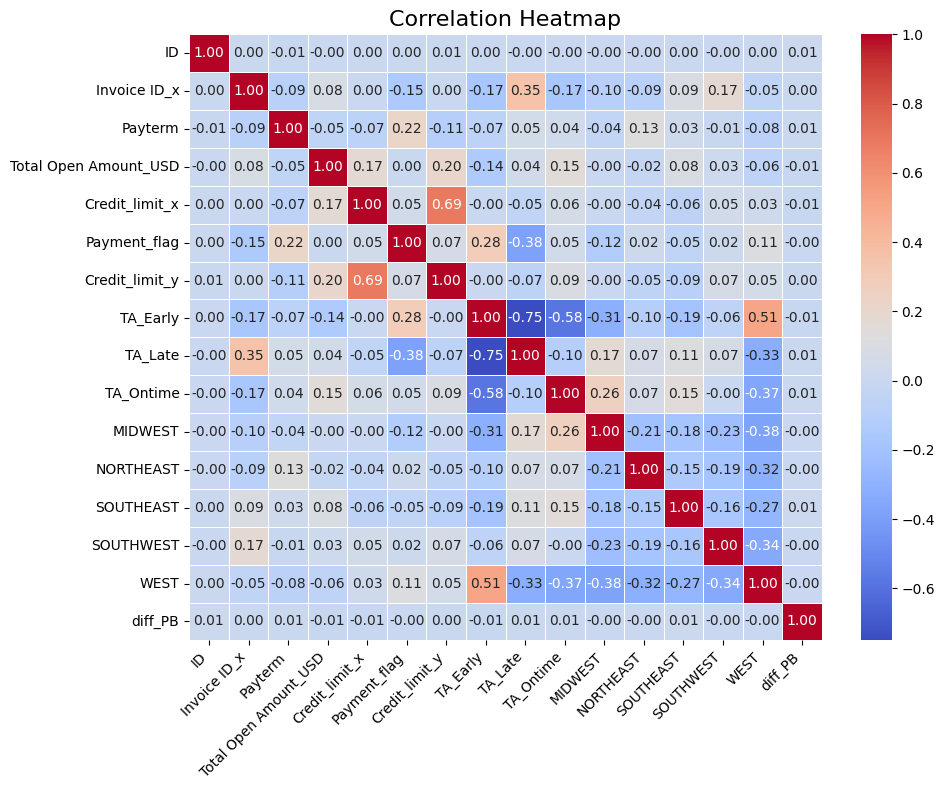

In [92]:
# Calculate the correlation matrix for the selected features
corr_matrix = Model_columns.corr()

# Set up the heatmap size and create a correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot for better visualization and aesthetics
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Display the correlation heatmap
plt.show()


---

## Data For Modelling 

In [56]:
# Fill missing values in Model_columns with 0
Model_columns_v1 = Model_columns.fillna(0)


In [57]:
Model_columns_v1.head()

,ID,Invoice ID_x,Payterm,Total Open Amount_USD,Credit_limit_x,Payment_flag,Credit_limit_y,TA_Early,TA_Late,TA_Ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB
0,1,1930438491.00,15,54273.30,50000,-1,81421.56,84.43,14.51,1.06,0,0,0,0,1,3
1,2,1929646410.00,20,79656.60,50000,3,42777.78,97.71,0.00,2.29,1,0,0,0,0,2
2,3,1929873765.00,15,2253.90,100000,-92,95569.62,34.33,30.84,34.83,0,1,0,0,0,0
3,4,1930147974.00,15,33133.30,100000,3,81421.56,84.43,14.51,1.06,0,0,0,0,1,3
4,5,2960581231.00,14,16447.10,100000,-61,67800.00,0.16,99.84,0.00,0,0,1,0,0,4


In [58]:
# Split the data into features (X) and target variable (y)
X = Model_columns_v1.drop('Payment_flag', axis=1)
y = Model_columns_v1['Payment_flag']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [59]:
# Drop unnecessary columns from the training and test feature sets
X_train_wid = X_train.drop(['Invoice ID_x', 'ID'], axis=1)
X_test_wid = X_test.drop(['Invoice ID_x', 'ID'], axis=1)


---

In [60]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define a list of regressors
regressors = [RandomForestRegressor(), LinearRegression(), KNeighborsRegressor(), GradientBoostingRegressor(), SVR()]

best_regressor = None
best_rmse = np.inf

# Iterate over the regressors to find the best one
for regressor in regressors:
    regressor.fit(X_train_wid, y_train)
    y_pred = regressor.predict(X_test_wid)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred)

    if rmse < best_rmse:
        best_rmse = rmse
        best_regressor = regressor

# Use the best regressor for prediction
y_pred = best_regressor.predict(X_test_wid)

# Evaluate the performance of the best regressor
rmse = np.sqrt(mean_squared_error(y_test, y_pred)
print("Best Regressor: ", best_regressor)
print("RMSE: ", rmse)


Best Regressor:  GradientBoostingRegressor()
RMSE:  7.585288177953541


#### Choosing the best Model

In [62]:
X_test

,ID,Invoice ID_x,Payterm,Total Open Amount_USD,Credit_limit_x,Credit_limit_y,TA_Early,TA_Late,TA_Ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB
32823,32824,1929994452.00,15,24177.00,50000,79130.43,1.63,63.40,34.97,0,0,1,0,0,1
16298,16299,1929646090.00,17,5208.70,100000,173207.55,44.25,47.48,8.26,0,1,0,0,0,3
28505,28506,1929917929.00,15,30591.50,100000,81421.56,84.43,14.51,1.06,0,0,0,0,1,4
6689,6690,1929830878.00,15,20612.40,100000,74474.47,1.79,51.44,46.77,0,0,1,0,0,2
26893,26894,1930548952.00,15,9216.20,5000,44375.00,84.48,13.97,1.55,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,3780,1930548709.00,15,481.80,100000,82040.94,1.93,50.84,47.23,1,0,0,0,0,4
11973,11974,1929209537.00,15,223.50,100000,81421.56,84.43,14.51,1.06,0,0,0,0,1,1
35668,35669,2960601601.00,17,133705.10,100000,100000.00,28.28,54.13,17.59,0,0,1,0,0,3
483,484,1930211877.00,21,14744.00,20000,39928.32,57.46,31.31,11.23,0,0,1,0,0,3


In [63]:
X_train_wid

,Payterm,Total Open Amount_USD,Credit_limit_x,Credit_limit_y,TA_Early,TA_Late,TA_Ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB
38015,12,65768.10,50000,88142.86,0.00,99.82,0.18,0,0,0,0,1,0
2281,11,35203.60,100000,78873.24,0.35,99.61,0.04,0,0,0,1,0,1
36629,15,13125.10,50000,81421.56,84.43,14.51,1.06,0,0,0,0,1,3
6087,36,17741.30,100000,62195.12,32.14,67.86,0.00,0,0,0,0,1,1
11792,15,2121.90,10000,6346.15,3.38,11.67,84.95,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,15,1388.90,100000,100000.00,1.44,74.79,23.77,0,0,1,0,0,0
11284,15,35601.40,20000,20000.00,0.00,0.00,100.00,0,1,0,0,0,4
38158,15,13215.00,20000,18021.98,8.94,18.86,72.20,1,0,0,0,0,4
860,15,22466.40,100000,81421.56,84.43,14.51,1.06,0,0,0,0,1,4


In [64]:
# Create a gradient boosting regression model
model_gb = GradientBoostingRegressor()

# Fit the model to the training data
model_gb.fit(X_train_wid, y_train)

# Get feature importances
importances = model_gb.feature_importances_

# Predict on the training and test data
y_train_pred = model_gb.predict(X_train_wid)
y_test_pred = model_gb.predict(X_test_wid)

# Evaluate the model using R-squared and mean squared error
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Training Mean Squared Error (MSE):", train_mse)
print("Test Mean Squared Error (MSE):", test_mse)


Training R-squared: 0.5044536237889192
Test R-squared: 0.49316933410208685
Training Mean Squared Error (MSE): 58.846833145009306
Test Mean Squared Error (MSE): 57.77288819255645


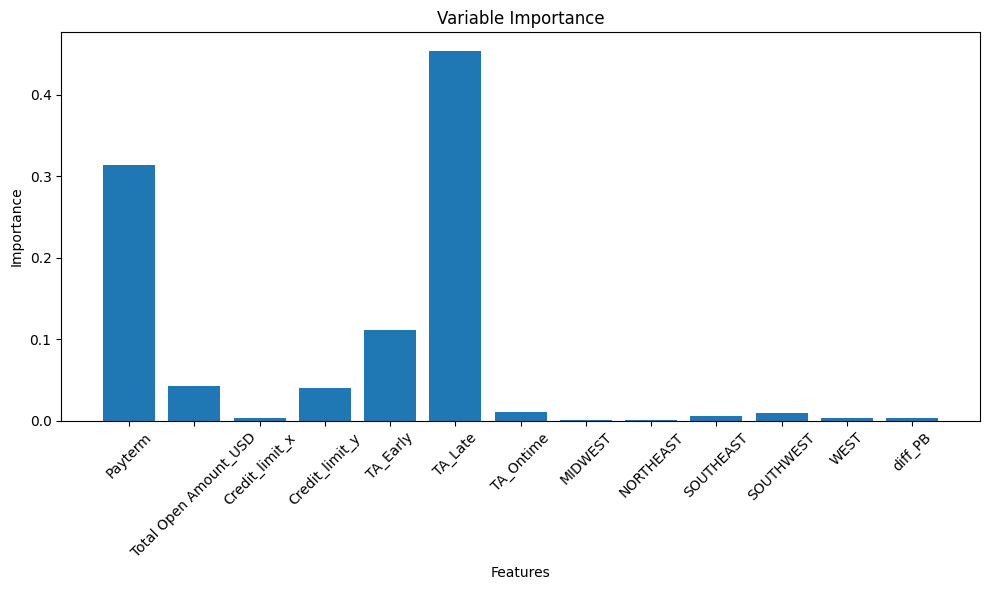

In [65]:
# Create a variable importance graph
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot feature importances
plt.bar(X_train_wid.columns, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Variable Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust the spacing of the plot elements
plt.show()


In [66]:
# Convert NumPy arrays to DataFrames for train and test predictions
train_predictions = pd.DataFrame(y_train_pred)
test_predictions = pd.DataFrame(y_test_pred)

# Display the DataFrames
print(train_predictions)
print(test_predictions)


          0
0     -5.87
1     -6.39
2      2.33
3     -7.88
4     -1.26
...     ...
27995 -2.74
27996 -0.52
27997 -0.94
27998  2.53
27999 -7.04

[28000 rows x 1 columns]
          0
0     -2.14
1      6.57
2      2.62
3     -1.67
4      2.55
...     ...
11995 -1.70
11996  1.60
11997  0.13
11998  6.06
11999 -5.68

[12000 rows x 1 columns]


In [67]:
# Reset the index of the DataFrame for training features
X_train_reset = X_train.reset_index()

# Display the DataFrame with the reset index
print(X_train_reset)


       index     ID  Invoice ID_x  Payterm  Total Open Amount_USD  \
0      38015  38016 2960588404.00       12               65768.10   
1       2281   2282 2960520931.00       11               35203.60   
2      36629  36630 1928650917.00       15               13125.10   
3       6087   6088 2960612114.00       36               17741.30   
4      11792  11793 1930573728.00       15                2121.90   
...      ...    ...           ...      ...                    ...   
27995   6265   6266 1930019458.00       15                1388.90   
27996  11284  11285 1928702643.00       15               35601.40   
27997  38158  38159 1929445251.00       15               13215.00   
27998    860    861 1928589831.00       15               22466.40   
27999  15795  15796 1928725413.00       15               11380.80   

       Credit_limit_x  Credit_limit_y  TA_Early  TA_Late  TA_Ontime  MIDWEST  \
0               50000        88142.86      0.00    99.82       0.18        0   
1          

In [68]:
# Merge the DataFrames on the common column identifier by concatenating along axis=1
merged_df_v2 = pd.concat([X_train_reset, train_predictions], axis=1)


In [69]:
# Reset the index of the DataFrame for testing features
X_test_reset = X_test.reset_index()

# Display the DataFrame with reset index
print(X_test_reset)

       index     ID  Invoice ID_x  Payterm  Total Open Amount_USD  \
0      32823  32824 1929994452.00       15               24177.00   
1      16298  16299 1929646090.00       17                5208.70   
2      28505  28506 1929917929.00       15               30591.50   
3       6689   6690 1929830878.00       15               20612.40   
4      26893  26894 1930548952.00       15                9216.20   
...      ...    ...           ...      ...                    ...   
11995   3779   3780 1930548709.00       15                 481.80   
11996  11973  11974 1929209537.00       15                 223.50   
11997  35668  35669 2960601601.00       17              133705.10   
11998    483    484 1930211877.00       21               14744.00   
11999   1380   1381 2960585220.00       11                1154.40   

       Credit_limit_x  Credit_limit_y  TA_Early  TA_Late  TA_Ontime  MIDWEST  \
0               50000        79130.43      1.63    63.40      34.97        0   
1          

In [70]:
# Merge test data features and predictions by concatenating along axis=1
merged_df_test = pd.concat([X_test_reset, test_predictions], axis=1)


In [71]:
merged_df_test

,index,ID,Invoice ID_x,Payterm,Total Open Amount_USD,Credit_limit_x,Credit_limit_y,TA_Early,TA_Late,TA_Ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB,0
0,32823,32824,1929994452.00,15,24177.00,50000,79130.43,1.63,63.40,34.97,0,0,1,0,0,1,-2.14
1,16298,16299,1929646090.00,17,5208.70,100000,173207.55,44.25,47.48,8.26,0,1,0,0,0,3,6.57
2,28505,28506,1929917929.00,15,30591.50,100000,81421.56,84.43,14.51,1.06,0,0,0,0,1,4,2.62
3,6689,6690,1929830878.00,15,20612.40,100000,74474.47,1.79,51.44,46.77,0,0,1,0,0,2,-1.67
4,26893,26894,1930548952.00,15,9216.20,5000,44375.00,84.48,13.97,1.55,0,1,0,0,0,0,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,3779,3780,1930548709.00,15,481.80,100000,82040.94,1.93,50.84,47.23,1,0,0,0,0,4,-1.70
11996,11973,11974,1929209537.00,15,223.50,100000,81421.56,84.43,14.51,1.06,0,0,0,0,1,1,1.60
11997,35668,35669,2960601601.00,17,133705.10,100000,100000.00,28.28,54.13,17.59,0,0,1,0,0,3,0.13
11998,483,484,1930211877.00,21,14744.00,20000,39928.32,57.46,31.31,11.23,0,0,1,0,0,3,6.06


In [72]:
# Merge all datasets with predicted values by concatenating along axis=0 (rows)
merged_df_all = pd.concat([merged_df_v2, merged_df_test], axis=0)


In [73]:
merged_df_all

,index,ID,Invoice ID_x,Payterm,Total Open Amount_USD,Credit_limit_x,Credit_limit_y,TA_Early,TA_Late,TA_Ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB,0
0,38015,38016,2960588404.00,12,65768.10,50000,88142.86,0.00,99.82,0.18,0,0,0,0,1,0,-5.87
1,2281,2282,2960520931.00,11,35203.60,100000,78873.24,0.35,99.61,0.04,0,0,0,1,0,1,-6.39
2,36629,36630,1928650917.00,15,13125.10,50000,81421.56,84.43,14.51,1.06,0,0,0,0,1,3,2.33
3,6087,6088,2960612114.00,36,17741.30,100000,62195.12,32.14,67.86,0.00,0,0,0,0,1,1,-7.88
4,11792,11793,1930573728.00,15,2121.90,10000,6346.15,3.38,11.67,84.95,0,1,0,0,0,1,-1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,3779,3780,1930548709.00,15,481.80,100000,82040.94,1.93,50.84,47.23,1,0,0,0,0,4,-1.70
11996,11973,11974,1929209537.00,15,223.50,100000,81421.56,84.43,14.51,1.06,0,0,0,0,1,1,1.60
11997,35668,35669,2960601601.00,17,133705.10,100000,100000.00,28.28,54.13,17.59,0,0,1,0,0,3,0.13
11998,483,484,1930211877.00,21,14744.00,20000,39928.32,57.46,31.31,11.23,0,0,1,0,0,3,6.06


In [74]:
# Display Columns
for col in Masterdata:
    print(col)


Business Code
Customer Number
Customer Name
Payment_Date
Business Year
Posting_Date
Due_Date
Payterm
Invoice Currency
Total Open Amount
USD_CURRENNCY
Total Open Amount_USD
Customer Payment Terms
Invoice ID_x
Is Open
DUNNLEVEL_x
Credit_limit_x
Baseline_Date
Region
ID
Payment_flag
payment_flagname
Invoice ID_y
Credit_limit_y
DUNNLEVEL_y
TA_Early
TA_Late
TA_Ontime
MIDWEST
NORTHEAST
SOUTHEAST
SOUTHWEST
WEST
diff_PB


In [75]:
# Display Masterdata
Masterdata

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,DUNNLEVEL_y,TA_Early,TA_Late,TA_Ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,1.52,84.43,14.51,1.06,0,0,0,0,1,3
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,1.46,97.71,0.00,2.29,1,0,0,0,0,2
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,1.54,34.33,30.84,34.83,0,1,0,0,0,0
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,1.52,84.43,14.51,1.06,0,0,0,0,1,3
4,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,1.53,0.16,99.84,0.00,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,200762301,C&S WH trust,2019-07-25,2019,2019-07-10,2019-07-25,15,USD,84780,...,1.49,8.37,30.74,60.89,1,0,0,0,0,4
39996,U001,200769623,WAL-MAR co,2019-09-03,2019,2019-08-15,2019-08-30,15,USD,6767,...,1.52,84.43,14.51,1.06,0,0,0,0,1,4
39997,U001,200772595,SAFEW associates,2020-03-05,2020,2020-02-19,2020-03-05,15,USD,6121,...,1.49,0.00,46.98,53.02,0,0,1,0,0,3
39998,U001,200726979,BJ'S llc,2019-12-12,2019,2019-11-27,2019-12-12,15,USD,63,...,1.50,1.93,50.84,47.23,1,0,0,0,0,0


In [76]:
# Rename the column to 'Predicted_value' in merged_df_all
merged_df_all = merged_df_all.rename(columns={0: 'Predicted_value'})


In [77]:
# Join the 'Predicted_value' column from merged_df_all to Masterdata using 'ID' as the common identifier
Final_merge = pd.merge(Masterdata, merged_df_all[['ID', 'Predicted_value']], on='ID')

# Display the merged DataFrame
print(Final_merge)


      Business Code Customer Number       Customer Name Payment_Date  \
0              U001       200769623        WAL-MAR corp   2020-02-11   
1              U001       200980828              BEN E    2019-08-08   
2              U001       200792734          MDV/ trust   2019-12-30   
3              U001       200769623  WAL-MAR foundation   2019-11-25   
4              CA02       140106181    THE  corporation   2019-12-04   
...             ...             ...                 ...          ...   
39995          U001       200762301        C&S WH trust   2019-07-25   
39996          U001       200769623          WAL-MAR co   2019-09-03   
39997          U001       200772595    SAFEW associates   2020-03-05   
39998          U001       200726979           BJ'S  llc   2019-12-12   
39999          U001       200020431            DEC corp   2019-01-15   

       Business Year Posting_Date   Due_Date  Payterm Invoice Currency  \
0               2020   2020-01-26 2020-02-10       15        

In [78]:
# Display Columns
for col in Final_merge:
    print (col)

Business Code
Customer Number
Customer Name
Payment_Date
Business Year
Posting_Date
Due_Date
Payterm
Invoice Currency
Total Open Amount
USD_CURRENNCY
Total Open Amount_USD
Customer Payment Terms
Invoice ID_x
Is Open
DUNNLEVEL_x
Credit_limit_x
Baseline_Date
Region
ID
Payment_flag
payment_flagname
Invoice ID_y
Credit_limit_y
DUNNLEVEL_y
TA_Early
TA_Late
TA_Ontime
MIDWEST
NORTHEAST
SOUTHEAST
SOUTHWEST
WEST
diff_PB
Predicted_value


In [79]:
from datetime import timedelta

In [80]:
# Convert the float column 'Predicted_value' to timedelta in days
Final_merge['Predict_Timedelta'] = pd.to_timedelta(Final_merge['Predicted_value'], unit='days')


In [81]:
# merge
Final_merge['Predict_Timedelta']

0         2 days 15:57:31.807958400
1         5 days 20:36:31.372243200
2       -2 days +22:07:34.659379200
3         2 days 14:52:51.467318400
4         -52 days +04:59:07.710864
                    ...            
39995   -1 days +05:58:08.812963200
39996     2 days 06:45:38.300947200
39997   -2 days +15:07:21.780998400
39998      -2 days +07:12:24.842592
39999     5 days 05:31:37.664947200
Name: Predict_Timedelta, Length: 40000, dtype: timedelta64[ns]

In [82]:
# Final_merge['Predict_Timedelta'] = Final_merge['Predict_Timedelta'].dt.days


In [83]:
Final_merge['Predict_Timedelta']

0         2 days 15:57:31.807958400
1         5 days 20:36:31.372243200
2       -2 days +22:07:34.659379200
3         2 days 14:52:51.467318400
4         -52 days +04:59:07.710864
                    ...            
39995   -1 days +05:58:08.812963200
39996     2 days 06:45:38.300947200
39997   -2 days +15:07:21.780998400
39998      -2 days +07:12:24.842592
39999     5 days 05:31:37.664947200
Name: Predict_Timedelta, Length: 40000, dtype: timedelta64[ns]

In [84]:
# Calculate 'Predicted_Date' by adding 'Predict_Timedelta' to 'Due_Date'
Final_merge['Predicted_Date'] = Final_merge['Due_Date'] + Final_merge['Predict_Timedelta']


In [85]:
Final_merge['Predicted_Date']

0       2020-02-12 15:57:31.807958400
1       2019-08-16 20:36:31.372243200
2       2019-09-27 22:07:34.659379200
3       2019-11-30 14:52:51.467318400
4       2019-08-13 04:59:07.710864000
                     ...             
39995   2019-07-24 05:58:08.812963200
39996   2019-09-01 06:45:38.300947200
39997   2020-03-03 15:07:21.780998400
39998   2019-12-10 07:12:24.842592000
39999   2019-01-29 05:31:37.664947200
Name: Predicted_Date, Length: 40000, dtype: datetime64[ns]

In [86]:
# Convert the datetime column to date
Final_merge['Predicted_Date'] = pd.to_datetime(Final_merge['Predicted_Date']).dt.date


In [87]:
Final_merge['Predicted_Date']

0        2020-02-12
1        2019-08-16
2        2019-09-27
3        2019-11-30
4        2019-08-13
            ...    
39995    2019-07-24
39996    2019-09-01
39997    2020-03-03
39998    2019-12-10
39999    2019-01-29
Name: Predicted_Date, Length: 40000, dtype: object

In [88]:
# Convert the 'Date' column from object to date
Final_merge['Predicted_Date'] = pd.to_datetime(Final_merge['Predicted_Date'])

In [89]:
# Get the week number from 'Predicted_Date' and 'Payment_Date'
Final_merge['Predicted_Week'] = Final_merge['Predicted_Date'].dt.week
Final_merge['ActualPaid_week'] = Final_merge['Payment_Date'].dt.week

# Display the DataFrame with the week numbers
print(Final_merge)


      Business Code Customer Number       Customer Name Payment_Date  \
0              U001       200769623        WAL-MAR corp   2020-02-11   
1              U001       200980828              BEN E    2019-08-08   
2              U001       200792734          MDV/ trust   2019-12-30   
3              U001       200769623  WAL-MAR foundation   2019-11-25   
4              CA02       140106181    THE  corporation   2019-12-04   
...             ...             ...                 ...          ...   
39995          U001       200762301        C&S WH trust   2019-07-25   
39996          U001       200769623          WAL-MAR co   2019-09-03   
39997          U001       200772595    SAFEW associates   2020-03-05   
39998          U001       200726979           BJ'S  llc   2019-12-12   
39999          U001       200020431            DEC corp   2019-01-15   

       Business Year Posting_Date   Due_Date  Payterm Invoice Currency  \
0               2020   2020-01-26 2020-02-10       15        

In [90]:
# Calculate accuracy using the formula (actual - predicted) / actual
# Calculate the number of correct predictions
# correct_predictions = (Final_merge['ActualPaid_week'] == Final_merge['Predicted_Week']).sum()

# Calculate the total number of predictions
# total_predictions = len(Final_merge)

# Calculate accuracy
# accuracy = correct_predictions / total_predictions

# Display the accuracy
# print("Accuracy:", accuracy)

---

# AP Code Starts Here 

In [ ]:
# Read data from SQL table 'suppliers_data'
suppliers_data = pd.read_sql("Select * from suppliers_data", connection)

# Display the first rows of the DataFrame
suppliers_data.head()


In [ ]:
# Read data from SQL table 'payables_data'
payables_data = pd.read_sql("Select * from payables_data", connection)

# Display the first rows of the DataFrame
payables_data.head()


,Invoice Number,Posting Date,Invoice Date,Payment Date,Net Due Date (System Calculated Date),Supplier ID,Invoice Amount,Fiscal year,Overdue,Invoice Status,Spend Category,Total Outstanding amount,Late payment fees,Payterm_n,Vendor_Type
0,INV-5978675602067198,04-12-2019,04-12-2019,30-12-2019,04-01-2020,S-198,7147,2019-2020,0,Paid,Taxes,0,0,30,Domestic
1,INV-4385639898658799,16-03-2020,12-03-2020,,16-04-2020,S-187,8575,2020-2021,75,Unpaid,Raw Material,8575,600,30,Domestic
2,INV-4586812911382721,26-12-2019,24-12-2019,01-01-2020,26-02-2020,S-300,6790,2019-2020,0,Paid,Raw Material,0,0,60,Domestic
3,INV-8091675473911407,14-01-2020,10-01-2020,,14-02-2020,S-497,6575,2020-2021,137,Unpaid,Services,6575,822,30,Domestic
4,INV-9623721287362728,08-12-2019,04-12-2019,20-01-2020,08-03-2020,S-310,12635,2019-2020,0,Paid,Raw Material,0,0,90,Domestic


In [93]:
# Read data from an Excel file ('suppliers_data.xls')
suppliers_data = pd.read_excel("data/suppliers_data.xls")

# Read data from an Excel file ('payables_data.xls')
payables_data = pd.read_excel("data/payables_data.xls")


In [94]:
# Create a copy of the 'payables_data' DataFrame as 'df_ap'
df_ap = payables_data.copy()

# Print the dimensions of the DataFrame
print('Dimension data: {} rows and {} columns'.format(len(df_ap), len(df_ap.columns)))

df_ap.head()


Dimension data: 20000 rows and 15 columns


,Invoice Number,Posting Date,Invoice Date,Payment Date,Net Due Date (System Calculated Date),Supplier ID,Invoice Amount,Fiscal year,Overdue,Invoice Status,Spend Category,Total Outstanding amount,Late payment fees,Payterm_n,Vendor_Type
0,INV-5978675602067198,2019-04-12 00:00:00,2019-04-12 00:00:00,30-12-2019,2020-04-01 00:00:00,S-198,7147,2019-2020,0,Paid,Taxes,0,0,30,Domestic
1,INV-4385639898658799,16-03-2020,2020-12-03 00:00:00,NaN,16-04-2020,S-187,8575,2020-2021,75,Unpaid,Raw Material,8575,600,30,Domestic
2,INV-4586812911382721,26-12-2019,24-12-2019,2020-01-01 00:00:00,26-02-2020,S-300,6790,2019-2020,0,Paid,Raw Material,0,0,60,Domestic
3,INV-8091675473911407,14-01-2020,2020-10-01 00:00:00,NaN,14-02-2020,S-497,6575,2020-2021,137,Unpaid,Services,6575,822,30,Domestic
4,INV-9623721287362728,2019-08-12 00:00:00,2019-04-12 00:00:00,20-01-2020,2020-08-03 00:00:00,S-310,12635,2019-2020,0,Paid,Raw Material,0,0,90,Domestic


In [95]:
df_ap.dtypes

Invoice Number                           object
Posting Date                             object
Invoice Date                             object
Payment Date                             object
Net Due Date (System Calculated Date)    object
Supplier ID                              object
Invoice Amount                            int64
Fiscal year                              object
Overdue                                   int64
Invoice Status                           object
Spend Category                           object
Total Outstanding amount                  int64
Late payment fees                         int64
Payterm_n                                 int64
Vendor_Type                              object
dtype: object

In [96]:
# Convert date time
# remove data with no payment date for this analysis, incase of actual problem statement use that for prediction 
# Filter and keep rows where 'column_name' is not equal to the particular value
# df_ap = df_ap[df_ap['Invoice Status'] != Paid]


# Filter and keep rows where 'Invoice Status' is not 'Unpaid'
df_Paid = df_ap[df_ap['Invoice Status'] != 'Unpaid']

# 'Unpaid' data


In [97]:
# view the datatype
df_ap.dtypes

Invoice Number                           object
Posting Date                             object
Invoice Date                             object
Payment Date                             object
Net Due Date (System Calculated Date)    object
Supplier ID                              object
Invoice Amount                            int64
Fiscal year                              object
Overdue                                   int64
Invoice Status                           object
Spend Category                           object
Total Outstanding amount                  int64
Late payment fees                         int64
Payterm_n                                 int64
Vendor_Type                              object
dtype: object

In [98]:
# Convert date columns to datetime
df_Paid['Posting_Date'] = pd.to_datetime(df_Paid['Posting Date'])
df_Paid['Due_Date'] = pd.to_datetime(df_Paid['Net Due Date (System Calculated Date)'])
df_Paid['Invoice Date'] = pd.to_datetime(df_Paid['Invoice Date'])
df_Paid['Payment Date'] = pd.to_datetime(df_Paid['Payment Date'])


In [99]:
# Convert and round numeric columns to specified data types
df_Paid['Invoice Amount'] = df_Paid['Invoice Amount'].astype(float).round(1)
df_Paid['Overdue'] = df_Paid['Overdue'].astype(float).round(1)
df_Paid['Total Outstanding amount'] = df_Paid['Total Outstanding amount'].astype(float).round(1)
df_Paid['Late payment fees'] = df_Paid['Late payment fees'].astype(float).round(1)
df_Paid['Payterm_n'] = df_Paid['Payterm_n'].astype(int)


In [100]:
# Copy the filtered DataFrame 'df_Paid' into 'Result_dp'
Result_dp = df_Paid


In [101]:
# checking datatype for any other conversion
Result_dp.dtypes

Invoice Number                                   object
Posting Date                                     object
Invoice Date                             datetime64[ns]
Payment Date                             datetime64[ns]
Net Due Date (System Calculated Date)            object
Supplier ID                                      object
Invoice Amount                                  float64
Fiscal year                                      object
Overdue                                         float64
Invoice Status                                   object
Spend Category                                   object
Total Outstanding amount                        float64
Late payment fees                               float64
Payterm_n                                         int32
Vendor_Type                                      object
Posting_Date                             datetime64[ns]
Due_Date                                 datetime64[ns]
dtype: object

In [102]:
# Creating ID column
Result_dp['ID'] = range(1, len(Result_dp) + 1)

In [103]:
Result_dp

,Invoice Number,Posting Date,Invoice Date,Payment Date,Net Due Date (System Calculated Date),Supplier ID,Invoice Amount,Fiscal year,Overdue,Invoice Status,Spend Category,Total Outstanding amount,Late payment fees,Payterm_n,Vendor_Type,Posting_Date,Due_Date,ID
0,INV-5978675602067198,2019-04-12 00:00:00,2019-04-12,2019-12-30,2020-04-01 00:00:00,S-198,7147.00,2019-2020,0.00,Paid,Taxes,0.00,0.00,30,Domestic,2019-04-12,2020-04-01,1
2,INV-4586812911382721,26-12-2019,2019-12-24,2020-01-01,26-02-2020,S-300,6790.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,60,Domestic,2019-12-26,2020-02-26,2
4,INV-9623721287362728,2019-08-12 00:00:00,2019-04-12,2020-01-20,2020-08-03 00:00:00,S-310,12635.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-08-12,2020-08-03,3
5,INV-6391763768436907,2019-11-03 00:00:00,2019-11-03,2019-03-24,2019-11-04 00:00:00,S-191,6808.00,2019-2020,0.00,Paid,Services,0.00,0.00,30,Domestic,2019-11-03,2019-11-04,4
7,INV-576255376736098,18-07-2019,2019-07-15,2019-10-24,18-08-2019,S-222,5834.00,2019-2020,67.00,Paid,Raw Material,0.00,402.00,30,Domestic,2019-07-18,2019-08-18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,INV-2094234150697486,2019-05-02 00:00:00,2019-04-02,2019-03-14,2019-05-03 00:00:00,S-434,11870.00,2019-2020,9.00,Paid,Raw Material,0.00,63.00,30,Domestic,2019-05-02,2019-05-03,13984
19994,INV-9971508041177690,2019-03-04 00:00:00,2019-03-29,2019-03-05,2019-03-07 00:00:00,S-154,5444.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-03-04,2019-03-07,13985
19996,INV-923263686839893,2019-03-06 00:00:00,2019-03-06,2019-08-20,2019-03-09 00:00:00,S-449,13346.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-03-06,2019-03-09,13986
19998,INV-5306060259604092,2019-01-05 00:00:00,2019-01-05,2019-06-27,2019-01-08 00:00:00,S-158,13400.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-01-05,2019-01-08,13987


In [104]:
# Calculate the age of payments by subtracting 'Payment Date' from 'Due Date'
Result_dp['Payment_flag'] = Result_dp['Due_Date'] - Result_dp['Payment Date']


In [105]:
# Convert the 'Payment_flag' to an integer by extracting the number of days
Result_dp['Payment_flag'] = pd.to_numeric(Result_dp['Payment_flag'].dt.days, downcast='integer')


In [106]:
# early,late ontime flag, this will be needed when we create customer level features

# Create 'payment_flagname' based on 'Payment_flag' values to classify payments as ontime, late, or early
conditions = [
    (Result_dp['Payment_flag'] == 0),
    (Result_dp['Payment_flag'] < 0),
    (Result_dp['Payment_flag'] > 0)
]
choices = ['ontime', 'late', 'early']
Result_dp['payment_flagname'] = np.select(conditions, choices, default='NA')

# Print the updated DataFrame
print(Result_dp)



             Invoice Number         Posting Date Invoice Date Payment Date  \
0      INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   2019-12-30   
2      INV-4586812911382721           26-12-2019   2019-12-24   2020-01-01   
4      INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   2020-01-20   
5      INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   2019-03-24   
7       INV-576255376736098           18-07-2019   2019-07-15   2019-10-24   
...                     ...                  ...          ...          ...   
19993  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   2019-03-14   
19994  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   2019-03-05   
19996   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   2019-08-20   
19998  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   2019-06-27   
19999  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   2019-04-13   

      Net Due Date (System Calculated Date) Supplier ID  Invoic

In [107]:
Result_dp['payment_flagname'].value_counts()

early     7795
late      6074
ontime     119
Name: payment_flagname, dtype: int64

In [108]:
# Group the data frame by month and item and extract a number of stats from each group

# Group the DataFrame by 'Supplier ID' and 'payment_flagname' to create customer-level features
vendor_pivot = Result_dp.groupby(
    ['Supplier ID', 'payment_flagname']
).agg(
    {
        # Aggregate statistics: sum of 'Invoice Amount', mean of 'Late payment fees',
        # count of 'Invoice Number', and mean of 'Overdue'
        'Invoice Amount': "sum",
        'Late payment fees': 'mean',
        'Invoice Number': "count",
        'Overdue': "mean"
    }
).reset_index()



In [109]:
# Group the DataFrame by 'Supplier ID' to create additional customer-level features
vendor_pivot_others = Result_dp.groupby(
    ['Supplier ID']
).agg(
    {
        # Aggregate statistics: mean of 'Late payment fees', count of 'Invoice Number', and mean of 'Overdue'
        'Late payment fees': 'mean',
        'Invoice Number': "count",
        'Overdue': "mean"
    }
).reset_index()


In [110]:
# reshaped_data = vendor_pivot.pivot(index='Supplier ID', columns='payment_flagname')

# Pivot the DataFrame 'vendor_pivot' to create a new DataFrame 'reshaped_dataAP'
reshaped_dataAP = vendor_pivot.pivot(index=['Supplier ID'], columns='payment_flagname', values='Invoice Amount')

# Reset the index to make 'Supplier ID' a column again
# reshaped_dataAP = reshaped_dataAP.reset_index()

# Display the pivoted DataFrame
print(reshaped_dataAP)


payment_flagname     early      late   ontime
Supplier ID                                  
S-1               20114.00  33361.00 29647.00
S-10             195686.00 177684.00 18049.00
S-100             64792.00  49186.00      NaN
S-101            102777.00  81315.00 18720.00
S-102            186727.00 105914.00      NaN
...                    ...       ...      ...
S-95             143218.00 122706.00      NaN
S-96             199677.00  94972.00 13836.00
S-97              56813.00 110131.00      NaN
S-98             154104.00 134706.00      NaN
S-99             230768.00  66565.00      NaN

[500 rows x 3 columns]


In [111]:
# Fill missing values (NaN) with 0 in the 'reshaped_dataAP' DataFrame
df_filled_ap = reshaped_dataAP.fillna(0)


In [112]:
print(df_filled_ap)

payment_flagname     early      late   ontime
Supplier ID                                  
S-1               20114.00  33361.00 29647.00
S-10             195686.00 177684.00 18049.00
S-100             64792.00  49186.00     0.00
S-101            102777.00  81315.00 18720.00
S-102            186727.00 105914.00     0.00
...                    ...       ...      ...
S-95             143218.00 122706.00     0.00
S-96             199677.00  94972.00 13836.00
S-97              56813.00 110131.00     0.00
S-98             154104.00 134706.00     0.00
S-99             230768.00  66565.00     0.00

[500 rows x 3 columns]


In [113]:
# Calculate row sums
row_sums_ap = df_filled_ap.sum(axis=1)

In [114]:
# Calculate percentage split at the vendor level, similar to what was done for AR
df_percent_ap = df_filled_ap.div(row_sums_ap, axis=0) * 100


In [115]:
# Extract specific columns from 'vendor_pivot_others' DataFrame
df_ap_others = vendor_pivot_others.loc[:, ['Supplier ID', 'Invoice Number', 'Late payment fees', 'Overdue']]

# Print the extracted DataFrame
print(df_ap_others)


    Supplier ID  Invoice Number  Late payment fees  Overdue
0           S-1              36             187.11    25.61
1          S-10              32              49.59     8.75
2         S-100              23             145.48    22.91
3         S-101              18             131.89    21.83
4         S-102              24              38.50     6.67
..          ...             ...                ...      ...
495        S-95              23             121.61    22.13
496        S-96              25              57.08     8.56
497        S-97              28             119.04    15.36
498        S-98              26             119.62    18.62
499        S-99              24              33.75     6.58

[500 rows x 4 columns]


In [116]:
# Merge 'df_percent_ap' and 'df_ap_others' DataFrames based on 'Supplier ID'
merged_df_ap = pd.merge(df_percent_ap, df_ap_others, on='Supplier ID')


In [117]:
merged_df_ap

,Supplier ID,early,late,ontime,Invoice Number,Late payment fees,Overdue
0,S-1,24.20,40.13,35.67,36,187.11,25.61
1,S-10,49.99,45.39,4.61,32,49.59,8.75
2,S-100,56.85,43.15,0.00,23,145.48,22.91
3,S-101,50.68,40.09,9.23,18,131.89,21.83
4,S-102,63.81,36.19,0.00,24,38.50,6.67
...,...,...,...,...,...,...,...
495,S-95,53.86,46.14,0.00,23,121.61,22.13
496,S-96,64.73,30.79,4.49,25,57.08,8.56
497,S-97,34.03,65.97,0.00,28,119.04,15.36
498,S-98,53.36,46.64,0.00,26,119.62,18.62


In [118]:
Result_dp

,Invoice Number,Posting Date,Invoice Date,Payment Date,Net Due Date (System Calculated Date),Supplier ID,Invoice Amount,Fiscal year,Overdue,Invoice Status,Spend Category,Total Outstanding amount,Late payment fees,Payterm_n,Vendor_Type,Posting_Date,Due_Date,ID,Payment_flag,payment_flagname
0,INV-5978675602067198,2019-04-12 00:00:00,2019-04-12,2019-12-30,2020-04-01 00:00:00,S-198,7147.00,2019-2020,0.00,Paid,Taxes,0.00,0.00,30,Domestic,2019-04-12,2020-04-01,1,93,early
2,INV-4586812911382721,26-12-2019,2019-12-24,2020-01-01,26-02-2020,S-300,6790.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,60,Domestic,2019-12-26,2020-02-26,2,56,early
4,INV-9623721287362728,2019-08-12 00:00:00,2019-04-12,2020-01-20,2020-08-03 00:00:00,S-310,12635.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-08-12,2020-08-03,3,196,early
5,INV-6391763768436907,2019-11-03 00:00:00,2019-11-03,2019-03-24,2019-11-04 00:00:00,S-191,6808.00,2019-2020,0.00,Paid,Services,0.00,0.00,30,Domestic,2019-11-03,2019-11-04,4,225,early
7,INV-576255376736098,18-07-2019,2019-07-15,2019-10-24,18-08-2019,S-222,5834.00,2019-2020,67.00,Paid,Raw Material,0.00,402.00,30,Domestic,2019-07-18,2019-08-18,5,-67,late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,INV-2094234150697486,2019-05-02 00:00:00,2019-04-02,2019-03-14,2019-05-03 00:00:00,S-434,11870.00,2019-2020,9.00,Paid,Raw Material,0.00,63.00,30,Domestic,2019-05-02,2019-05-03,13984,50,early
19994,INV-9971508041177690,2019-03-04 00:00:00,2019-03-29,2019-03-05,2019-03-07 00:00:00,S-154,5444.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-03-04,2019-03-07,13985,2,early
19996,INV-923263686839893,2019-03-06 00:00:00,2019-03-06,2019-08-20,2019-03-09 00:00:00,S-449,13346.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-03-06,2019-03-09,13986,-164,late
19998,INV-5306060259604092,2019-01-05 00:00:00,2019-01-05,2019-06-27,2019-01-08 00:00:00,S-158,13400.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-01-05,2019-01-08,13987,-170,late


In [119]:
# Join invoice-level features with customer data using 'Supplier ID' as the key, and use a left join
Masterdata_ap = pd.merge(Result_dp, merged_df_ap, on='Supplier ID', how='left')

# Print the master DataFrame
print(Masterdata_ap)


           Invoice Number_x         Posting Date Invoice Date Payment Date  \
0      INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   2019-12-30   
1      INV-4586812911382721           26-12-2019   2019-12-24   2020-01-01   
2      INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   2020-01-20   
3      INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   2019-03-24   
4       INV-576255376736098           18-07-2019   2019-07-15   2019-10-24   
...                     ...                  ...          ...          ...   
13983  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   2019-03-14   
13984  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   2019-03-05   
13985   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   2019-08-20   
13986  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   2019-06-27   
13987  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   2019-04-13   

      Net Due Date (System Calculated Date) Supplier ID  Invoic

In [120]:
# Convert categorical columns 'Spend Category' and 'Vendor_Type' into dummy variables
dummy_df_ap = pd.get_dummies(Masterdata_ap[['Spend Category', 'Vendor_Type']])


In [121]:
# Concatenate the original DataFrame with the dummy variables along the columns (axis=1)
Masterdata_ap = pd.concat([Masterdata_ap, dummy_df_ap], axis=1)

# Print the updated DataFrame
print(Masterdata_ap)


           Invoice Number_x         Posting Date Invoice Date Payment Date  \
0      INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   2019-12-30   
1      INV-4586812911382721           26-12-2019   2019-12-24   2020-01-01   
2      INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   2020-01-20   
3      INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   2019-03-24   
4       INV-576255376736098           18-07-2019   2019-07-15   2019-10-24   
...                     ...                  ...          ...          ...   
13983  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   2019-03-14   
13984  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   2019-03-05   
13985   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   2019-08-20   
13986  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   2019-06-27   
13987  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   2019-04-13   

      Net Due Date (System Calculated Date) Supplier ID  Invoic

In [122]:
# Calculate the difference between 'Posting_Date' and 'Invoice Date'
Masterdata_ap['diff_PB'] = Masterdata_ap['Posting_Date'] - Masterdata_ap['Invoice Date']


In [123]:
# Convert the 'diff_PB' column to an integer by extracting the number of days
Masterdata_ap['diff_PB'] = pd.to_numeric(Masterdata_ap['diff_PB'].dt.days, downcast='integer')


In [124]:
# Select specific columns for modeling from the 'Masterdata_ap' DataFrame
Model_columns_ap = Masterdata_ap.loc[:, ['ID', 'Invoice Number_x', 'diff_PB', 'Spend Category_Fees',
                                         'Spend Category_Raw Material', 'Spend Category_Services', 'Spend Category_Taxes',
                                         'Spend Category_Utility', 'Overdue_y', 'Payterm_n', 'Vendor_Type_Domestic',
                                         'Vendor_Type_International', 'Late payment fees_y', 'Invoice Number_y', 'early',
                                         'late', 'ontime', 'Payment_flag', 'Invoice Amount']]


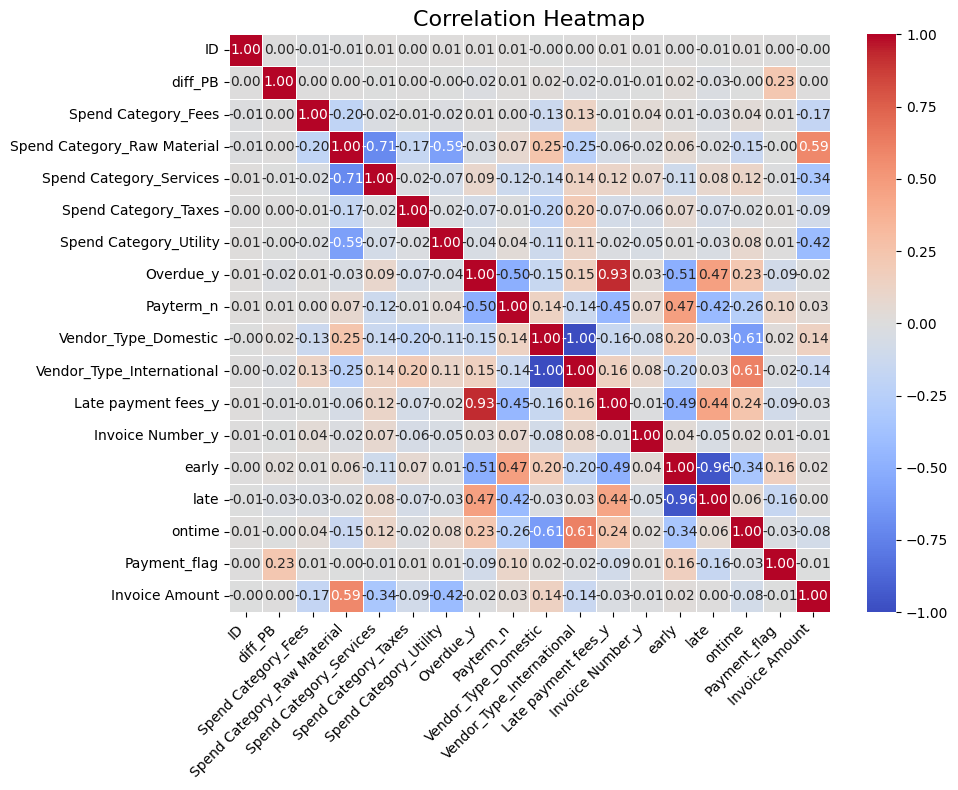

In [126]:
# Calculate the correlation matrix for the selected columns
corr_matrix = Model_columns_ap.corr()

# Set up the size of the heatmap for better visualization
plt.figure(figsize=(10, 8))

# Create a correlation plot using seaborn with annotations, a color map, and formatting
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title and adjust the layout for better aesthetics
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


In [127]:
# Find columns with a correlation greater than 0.8 and drop them to reduce multicollinearity
high_corr_columns = set()
for i in range(len(corr_matrix_ap.columns)):
    for j in range(i):
        if abs(corr_matrix_ap.iloc[i, j]) > 0.8:
            colname = corr_matrix_ap.columns[i]
            high_corr_columns.add(colname)

# Drop the high-correlation columns from the 'Model_columns_ap' DataFrame
Model_columns_ap_new = Model_columns_ap.drop(high_corr_columns, axis=1)

# Print the DataFrame with reduced multicollinearity
print(Model_columns_ap_new)


          ID      Invoice Number_x  diff_PB  Spend Category_Fees  \
0          1  INV-5978675602067198        0                    0   
1          2  INV-4586812911382721        2                    0   
2          3  INV-9623721287362728      122                    0   
3          4  INV-6391763768436907        0                    0   
4          5   INV-576255376736098        3                    0   
...      ...                   ...      ...                  ...   
13983  13984  INV-2094234150697486       30                    0   
13984  13985  INV-9971508041177690      -25                    0   
13985  13986   INV-923263686839893        0                    0   
13986  13987  INV-5306060259604092        0                    0   
13987  13988  INV-3588784185880170      -53                    0   

       Spend Category_Raw Material  Spend Category_Services  \
0                                0                        0   
1                                1                       

In [128]:
# Fill any missing values with 0 in 'Model_columns_ap_new'
Model_columns_AP1 = Model_columns_ap_new.fillna(0)


In [129]:
Model_columns_AP1

# Split the data into features (X) and the target variable (y)
X_AP = Model_columns_AP1.drop('Payment_flag', axis=1)
y_AP = Model_columns_AP1['Payment_flag']

# Split the data into training and testing sets using a 70-30 split
X_trainap, X_testap, y_trainap, y_testap = train_test_split(X_AP, y_AP, test_size=0.3, random_state=42)





In [130]:
# Remove 'Invoice Number_x' and 'ID' columns from the training and testing feature sets
X_train_ap = X_trainap.drop(['Invoice Number_x', 'ID'], axis=1)
X_test_ap = X_testap.drop(['Invoice Number_x', 'ID'], axis=1)


In [131]:
# Create a gradient boosting regression model
model_gb_ap = GradientBoostingRegressor()

# Fit the model to the training data
model_gb_ap.fit(X_train_ap, y_trainap)

# Get feature importances
importances_ap = model_gb_ap.feature_importances_

# Predict on the training and test data
y_train_predap = model_gb_ap.predict(X_train_ap)
y_test_predap = model_gb_ap.predict(X_test_ap)

# Evaluate the model using R-squared and mean squared error
train_r2ap = r2_score(y_trainap, y_train_predap)
test_r2ap = r2_score(y_testap, y_test_predap)
train_mseap = mean_squared_error(y_trainap, y_train_predap)
test_mseap = mean_squared_error(y_testap, y_test_predap)

# Print the evaluation metrics
print("Training R-squared:", train_r2ap)
print("Test R-squared:", test_r2ap)
print("Training Mean Squared Error (MSE):", train_mseap)
print("Test Mean Squared Error (MSE):", test_mseap)


Training R-squared: 0.16828166692745905
Test R-squared: 0.13102539072461317
Training Mean Squared Error (MSE): 13149.24602213736
Test Mean Squared Error (MSE): 13867.936731418791


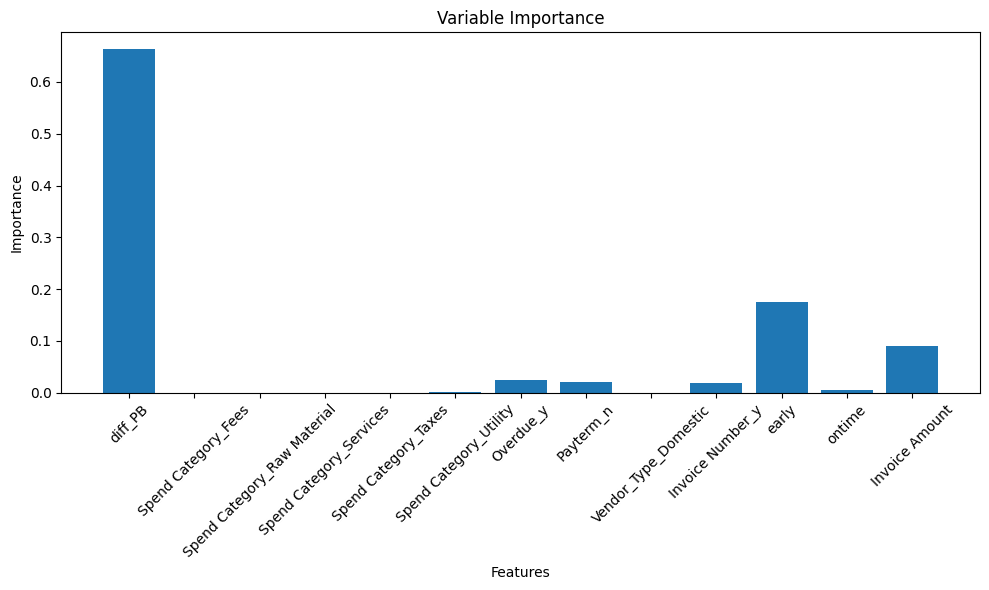

In [132]:
# Create a variable importance graph to visualize feature importance
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a bar chart for feature importances
plt.bar(X_train_ap.columns, importances_ap)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Variable Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust the spacing of the plot elements
plt.show()


In [133]:
# Convert NumPy arrays to DataFrames for train and test predictions
train_predictions_ap = pd.DataFrame(y_train_predap)
test_predictions_ap = pd.DataFrame(y_test_predap)

# Display the DataFrames with train and test predictions
print(train_predictions_ap)
print(test_predictions_ap)


          0
0     54.38
1     32.45
2     18.21
3     21.28
4     98.35
...     ...
9786  15.14
9787 -20.68
9788  -0.96
9789  26.45
9790 -38.71

[9791 rows x 1 columns]
          0
0     39.47
1    -18.97
2     30.33
3     -4.41
4     20.59
...     ...
4192 -11.41
4193  -0.56
4194  12.22
4195  51.31
4196  34.69

[4197 rows x 1 columns]


In [134]:
# Reset the index of the 'X_train_ap' DataFrame
X_train_reset = X_train_ap.reset_index()

# Display the DataFrame with the reset index
print(X_train_reset)


      index  diff_PB  Spend Category_Fees  Spend Category_Raw Material  \
0      7798       92                    0                            1   
1     11830        2                    0                            1   
2     12947        3                    0                            1   
3      5500        2                    0                            1   
4      5888      153                    0                            1   
...     ...      ...                  ...                          ...   
9786   5191        0                    0                            1   
9787  13418       90                    0                            1   
9788   5390        0                    0                            0   
9789    860        4                    0                            1   
9790   7270      -84                    0                            1   

      Spend Category_Services  Spend Category_Taxes  Spend Category_Utility  \
0                           0   

In [135]:

# Merge the DataFrames on the common column identifier

# Merge DataFrames using 'pd.concat' along axis=1 (columns)
merged_df_v2_ap = pd.concat([X_train_reset, train_predictions_ap], axis=1)

# merged_df = pd.merge(train_predictions, X_train)

In [136]:
# Reset the index of the DataFrame
X_test_reset_ap = X_test_ap.reset_index()

# Display the DataFrame with reset index
print(X_test_reset_ap)

      index  diff_PB  Spend Category_Fees  Spend Category_Raw Material  \
0      9568      151                    0                            1   
1     11364        0                    0                            1   
2     11565        3                    0                            1   
3      3798        1                    0                            1   
4     12414        5                    0                            1   
...     ...      ...                  ...                          ...   
4192   3265        0                    0                            1   
4193  11796        4                    0                            1   
4194  11156        0                    0                            1   
4195   7624       30                    0                            1   
4196   9006        1                    0                            1   

      Spend Category_Services  Spend Category_Taxes  Spend Category_Utility  \
0                           0   

In [137]:
# Merge DataFrames using 'pd.concat' along axis=1 (columns)
merged_df_test_ap = pd.concat([X_test_reset_ap, test_predictions_ap], axis=1)


In [138]:
# Concatenate DataFrames along axis=0 (rows) to combine training and testing data
merged_df_all_ap = pd.concat([merged_df_v2_ap, merged_df_test_ap], axis=0)


In [139]:
# Rename the column with predictions to 'Predicted_value'
merged_df_all_ap = merged_df_all_ap.rename(columns={0: 'Predicted_value'})


In [140]:
# Masterdata_ap[Masterdata_ap['ID'] == 7799]

# Reset the index of the 'Masterdata_ap' DataFrame
Masterdata_ap = Masterdata_ap.reset_index()


In [141]:
# Join a single column ('Predicted_value') from 'merged_df_all_ap' to 'Masterdata_ap' based on the common identifier 'index'
Final_merge_ap = pd.merge(Masterdata_ap, merged_df_all_ap[['index', 'Predicted_value']], on='index')

# Display the merged DataFrame
print(Final_merge_ap)


       index      Invoice Number_x         Posting Date Invoice Date  \
0          0  INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   
1          1  INV-4586812911382721           26-12-2019   2019-12-24   
2          2  INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   
3          3  INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   
4          4   INV-576255376736098           18-07-2019   2019-07-15   
...      ...                   ...                  ...          ...   
13983  13983  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   
13984  13984  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   
13985  13985   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   
13986  13986  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   
13987  13987  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   

      Payment Date Net Due Date (System Calculated Date) Supplier ID  \
0       2019-12-30                   2020-04-01 00:00:00       

In [142]:
# Convert the float column 'Predicted_value' to a timedelta with days as the unit
Final_merge_ap['Predict_Timedelta'] = pd.to_timedelta(Final_merge_ap['Predicted_value'], unit='days')


In [143]:
# Calculate the 'Predicted_Date' by adding 'Due_Date' and 'Predict_Timedelta'
Final_merge_ap['Predicted_Date'] = Final_merge_ap['Due_Date'] + Final_merge_ap['Predict_Timedelta']


In [144]:
# Convert the 'Predicted_Date' column from datetime to date
Final_merge_ap['Predicted_Date'] = pd.to_datetime(Final_merge_ap['Predicted_Date']).dt.date


In [145]:
# Convert the 'Predicted_Date' column from object to date
Final_merge_ap['Predicted_Date'] = pd.to_datetime(Final_merge_ap['Predicted_Date'])


In [146]:
# Extract the week number from 'Predicted_Date' and 'Payment Date' columns
Final_merge_ap['Predicted_Week'] = Final_merge_ap['Predicted_Date'].dt.week
Final_merge_ap['ActualPaid_week'] = Final_merge_ap['Payment Date'].dt.week

# Print the DataFrame with the week numbers
print(Final_merge_ap)


       index      Invoice Number_x         Posting Date Invoice Date  \
0          0  INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   
1          1  INV-4586812911382721           26-12-2019   2019-12-24   
2          2  INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   
3          3  INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   
4          4   INV-576255376736098           18-07-2019   2019-07-15   
...      ...                   ...                  ...          ...   
13983  13983  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   
13984  13984  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   
13985  13985   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   
13986  13986  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   
13987  13987  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   

      Payment Date Net Due Date (System Calculated Date) Supplier ID  \
0       2019-12-30                   2020-04-01 00:00:00       

In [147]:
# Calculate accuracy by comparing actual and predicted weeks
correct_predictionsap = (Final_merge_ap['ActualPaid_week'] == Final_merge_ap['Predicted_Week']).sum()
total_predictionsap = len(Final_merge_ap)  # Calculate the total number of predictions
accuracyap = correct_predictionsap / total_predictionsap  # Calculate accuracy as a ratio of correct predictions to total predictions

# Print the calculated accuracy
print("Accuracy:", accuracyap)


Accuracy: 0.031527023162710895


In [148]:
Final_merge_ap.head()

,index,Invoice Number_x,Posting Date,Invoice Date,Payment Date,Net Due Date (System Calculated Date),Supplier ID,Invoice Amount,Fiscal year,Overdue_x,...,Spend Category_Taxes,Spend Category_Utility,Vendor_Type_Domestic,Vendor_Type_International,diff_PB,Predicted_value,Predict_Timedelta,Predicted_Date,Predicted_Week,ActualPaid_week
0,0,INV-5978675602067198,2019-04-12 00:00:00,2019-04-12,2019-12-30,2020-04-01 00:00:00,S-198,7147.00,2019-2020,0.00,...,1,0,1,0,0,16.50,16 days 12:06:05.846198400,2020-04-17,16,1
1,1,INV-4586812911382721,26-12-2019,2019-12-24,2020-01-01,26-02-2020,S-300,6790.00,2019-2020,0.00,...,0,0,1,0,2,8.55,8 days 13:11:47.602291200,2020-03-05,10,1
2,2,INV-9623721287362728,2019-08-12 00:00:00,2019-04-12,2020-01-20,2020-08-03 00:00:00,S-310,12635.00,2019-2020,0.00,...,0,0,1,0,122,74.82,74 days 19:39:04.816454400,2020-10-16,42,4
3,3,INV-6391763768436907,2019-11-03 00:00:00,2019-11-03,2019-03-24,2019-11-04 00:00:00,S-191,6808.00,2019-2020,0.00,...,0,0,1,0,0,4.39,4 days 09:23:39.826924800,2019-11-08,45,12
4,4,INV-576255376736098,18-07-2019,2019-07-15,2019-10-24,18-08-2019,S-222,5834.00,2019-2020,67.00,...,0,0,1,0,3,-1.79,-2 days +05:08:25.869465600,2019-08-16,33,43


In [149]:
# Display Columns
for col in Final_merge_ap:
    print(col)

index
Invoice Number_x
Posting Date
Invoice Date
Payment Date
Net Due Date (System Calculated Date)
Supplier ID
Invoice Amount
Fiscal year
Overdue_x
Invoice Status
Spend Category
Total Outstanding amount
Late payment fees_x
Payterm_n
Vendor_Type
Posting_Date
Due_Date
ID
Payment_flag
payment_flagname
early
late
ontime
Invoice Number_y
Late payment fees_y
Overdue_y
Spend Category_Fees
Spend Category_Raw Material
Spend Category_Services
Spend Category_Taxes
Spend Category_Utility
Vendor_Type_Domestic
Vendor_Type_International
diff_PB
Predicted_value
Predict_Timedelta
Predicted_Date
Predicted_Week
ActualPaid_week


---

# WCO Calculations Combining AR And AP 

In [150]:
Final_merge.head()

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB,Predicted_value,Predict_Timedelta,Predicted_Date,Predicted_Week,ActualPaid_week
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,0,0,0,1,3,2.66,2 days 15:57:31.807958400,2020-02-12,7,7
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,0,0,0,0,2,5.86,5 days 20:36:31.372243200,2019-08-16,33,32
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,1,0,0,0,0,-1.08,-2 days +22:07:34.659379200,2019-09-27,39,1
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,0,0,0,1,3,2.62,2 days 14:52:51.467318400,2019-11-30,48,48
4,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,0,1,0,0,4,-51.79,-52 days +04:59:07.710864,2019-08-13,33,49


#### GROUPBY and SUM AR and AP Amount By Week 

In [151]:
# Select specific columns using the 'loc' accessor for AR and AP data
Week_AR = Final_merge.loc[:, ['Predicted_Week', 'Total Open Amount_USD']]
Week_AP = Final_merge_ap.loc[:, ['Predicted_Week', 'Invoice Amount']]


In [152]:
Week_AR

,Predicted_Week,Total Open Amount_USD
0,7,54273.30
1,33,79656.60
2,39,2253.90
3,48,33133.30
4,33,16447.10
...,...,...
39995,30,84780.40
39996,35,6766.50
39997,10,6120.90
39998,50,63.50


In [153]:
Week_AP

,Predicted_Week,Invoice Amount
0,16,7147.00
1,10,6790.00
2,42,12635.00
3,45,6808.00
4,33,5834.00
...,...,...
13983,24,11870.00
13984,10,5444.00
13985,10,13346.00
13986,6,13400.00


In [154]:
# Group and aggregate the 'Week_AP' DataFrame by 'Predicted_Week' to calculate the total invoice amount for each week
APBYWEEK = Week_AP.groupby(['Predicted_Week']).agg({'Invoice Amount': 'sum'}).reset_index()


In [155]:
# Group and aggregate the 'Week_AR' DataFrame by 'Predicted_Week' to calculate the total open amount for each week in accounts receivable
ARBYWEEK = Week_AR.groupby(['Predicted_Week']).agg({'Total Open Amount_USD': 'sum'}).reset_index()


In [156]:
# Rename columns in the 'ARBYWEEK' and 'APBYWEEK' DataFrames
new_column_names_ar = {'Total Open Amount_USD': 'Amount_AR'}
ARBYWEEK.rename(columns=new_column_names_ar, inplace=True)
print(ARBYWEEK)

new_column_names_ap = {'Invoice Amount': 'Amount_AP'}
APBYWEEK.rename(columns=new_column_names_ap, inplace=True)
print(APBYWEEK)


    Predicted_Week   Amount_AR
0                1  8979590.20
1                2  7462215.50
2                3 25641445.20
3                4 33857132.40
4                5 35712760.70
5                6 38852055.10
6                7 37755476.30
7                8 37901416.90
8                9 37268964.50
9               10 35874643.50
10              11 34630372.80
11              12 23240276.20
12              13 22627468.60
13              14 19173783.40
14              15 22667038.00
15              16 21464747.60
16              17 22387160.60
17              18 22365314.70
18              19 20997489.10
19              20 22432372.70
20              21 23072721.70
21              22 20404411.80
22              23 21210994.10
23              24 21711354.20
24              25 20956866.40
25              26 21721573.40
26              27 25789905.10
27              28 22648209.00
28              29 20199158.70
29              30 19123549.70
30              31 19415664.80
31      

In [157]:
# Select specific columns for the total amount in accounts receivable (AR) and accounts payable (AP) by week
ARBYWEEK_AMNT = ARBYWEEK.loc[:, ['Amount_AR']]
APBYWEEK_AMNT = APBYWEEK.loc[:, ['Amount_AP']]


In [158]:
# Merge DataFrames 'ARBYWEEK' and 'APBYWEEK' using the common column 'Predicted_Week'
WCOBYWEEK_1 = pd.merge(ARBYWEEK, APBYWEEK, on='Predicted_Week')


In [159]:
# Rename columns in the 'WCOBYWEEK_1' DataFrame to clarify the source of the amounts
new_column_names_wco = {'Total Open Amount_USD': 'Amount_AR', 'Invoice Amount': 'Amount_AP'}
WCOBYWEEK_1.rename(columns=new_column_names_wco, inplace=True)
print(WCOBYWEEK_1)


    Predicted_Week   Amount_AR  Amount_AP
0                1  8979590.20 4180162.00
1                2  7462215.50 3912785.00
2                3 25641445.20 3855440.00
3                4 33857132.40 3999178.00
4                5 35712760.70 3798768.00
5                6 38852055.10 3398234.00
6                7 37755476.30 3469630.00
7                8 37901416.90 3438517.00
8                9 37268964.50 3714827.00
9               10 35874643.50 3037197.00
10              11 34630372.80 2708435.00
11              12 23240276.20 3111586.00
12              13 22627468.60 2481037.00
13              14 19173783.40 3017249.00
14              15 22667038.00 2548080.00
15              16 21464747.60 2669052.00
16              17 22387160.60 2263800.00
17              18 22365314.70 2297070.00
18              19 20997489.10 2599174.00
19              20 22432372.70 2517232.00
20              21 23072721.70 2236880.00
21              22 20404411.80 2252702.00
22              23 21210994.10 221

In [160]:
# Calculate the working capital by subtracting 'Amount_AP' from 'Amount_AR' for each week
WCOBYWEEK_1['Working_Capital'] = WCOBYWEEK_1['Amount_AR'] - WCOBYWEEK_1['Amount_AP']


In [161]:
WCOBYWEEK_1

,Predicted_Week,Amount_AR,Amount_AP,Working_Capital
0,1,8979590.20,4180162.00,4799428.20
1,2,7462215.50,3912785.00,3549430.50
2,3,25641445.20,3855440.00,21786005.20
3,4,33857132.40,3999178.00,29857954.40
4,5,35712760.70,3798768.00,31913992.70
5,6,38852055.10,3398234.00,35453821.10
6,7,37755476.30,3469630.00,34285846.30
7,8,37901416.90,3438517.00,34462899.90
8,9,37268964.50,3714827.00,33554137.50
9,10,35874643.50,3037197.00,32837446.50


---

# **Conclusion**

The Predictive Analytics Project for Working Capital Optimization aimed to strategically manage a company's current assets and liabilities to enhance operational efficiency and financial health. By finding the right balance between accounts receivable (AR) and accounts payable (AP), the project sought to ensure sufficient liquidity while minimizing costs and risks.

### **Key Achievements**

- Utilized historical AR and AP data for predictive modeling.
- Successfully forecasted customer and supplier payment timings.
- Proactively managed cash flow to ensure timely payments.
- Maintained a healthy cash position and enhanced liquidity.
- Effectively met financial obligations.

This project has enabled the company to make data-driven decisions, optimize working capital, and ensure a steady cash flow.

---